#### Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
from rasterio.mask import mask
from rasterio.plot import show
from natsort import natsorted
import earthpy.spatial as es
import pandas as pd
import geopandas
import rasterio
import pycrs
import os

file_dir=r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl'

#### Read in environmental data
-read in the ENVIREM and BIOCLIM raster files containing the environmental data<br>
-inspect the raster files <br>

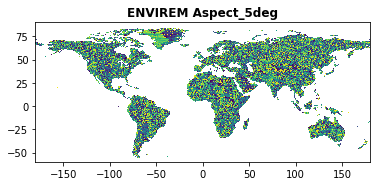

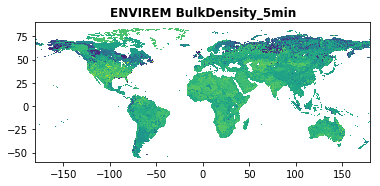

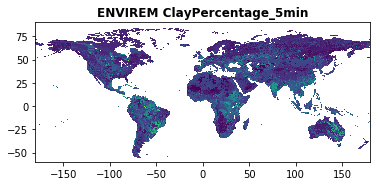

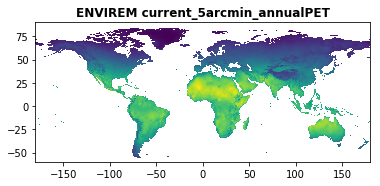

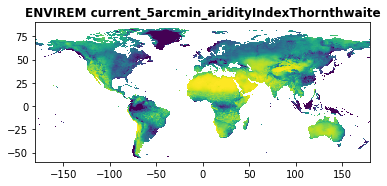

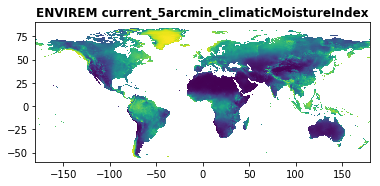

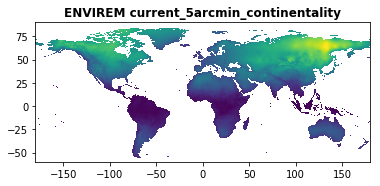

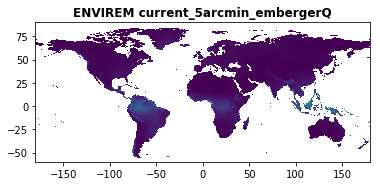

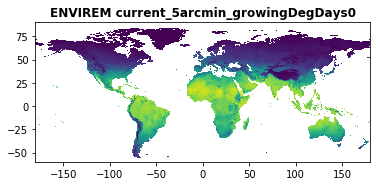

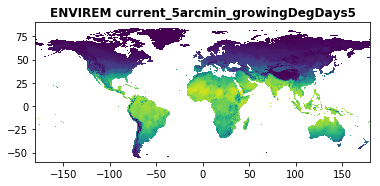

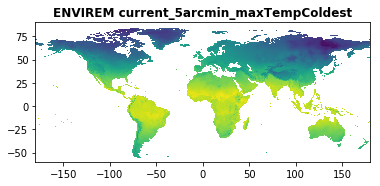

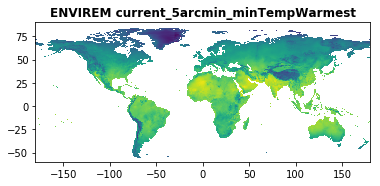

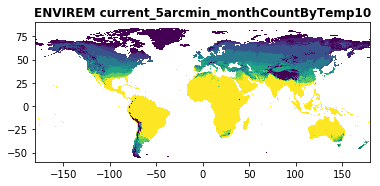

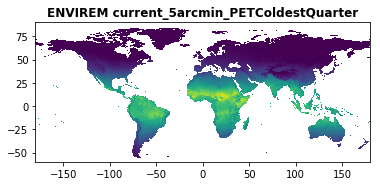

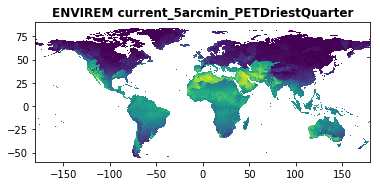

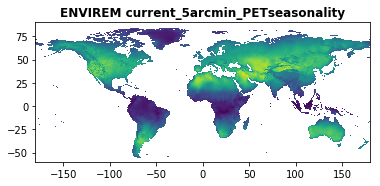

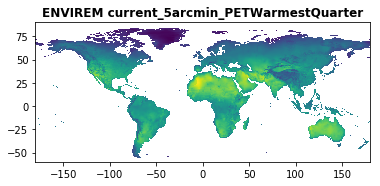

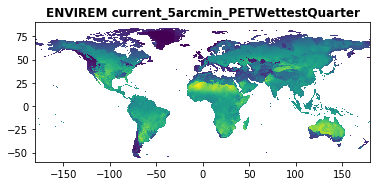

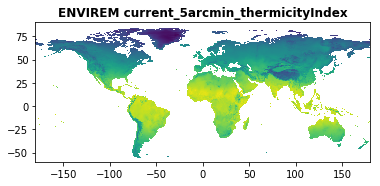

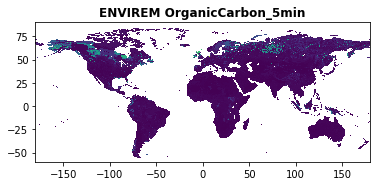

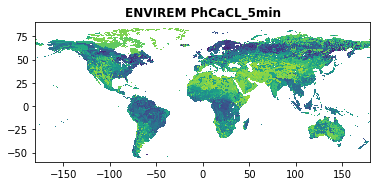

C:\Users\M-RAM\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\image.py:419: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)


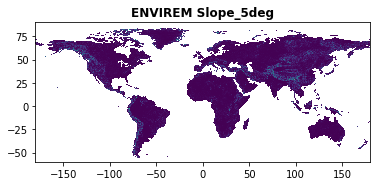

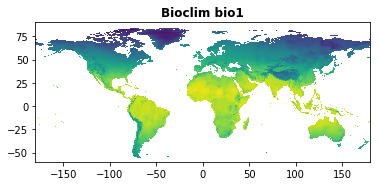

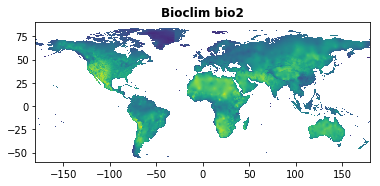

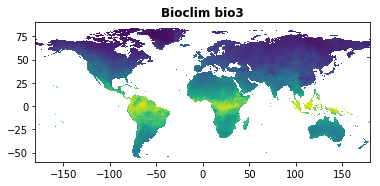

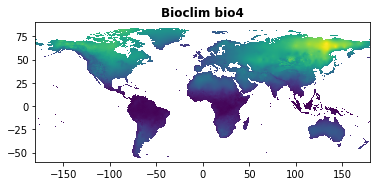

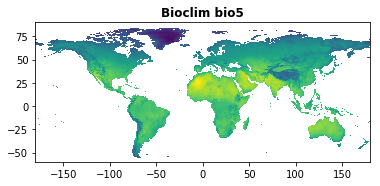

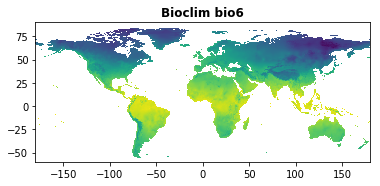

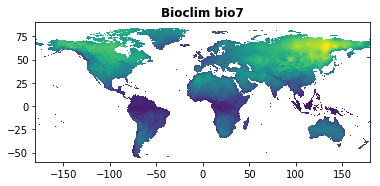

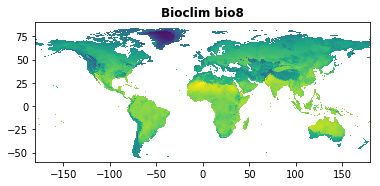

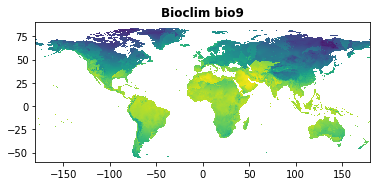

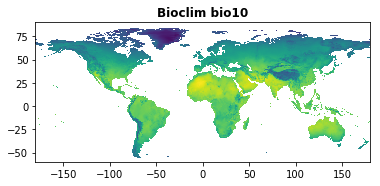

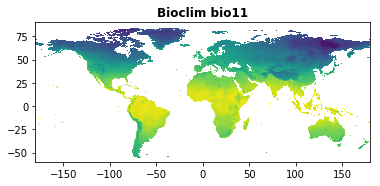

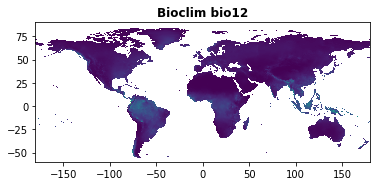

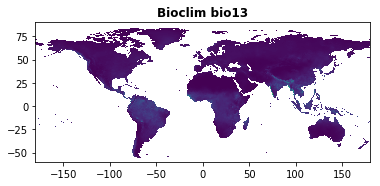

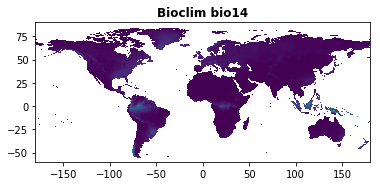

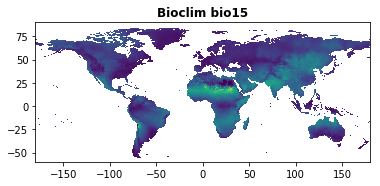

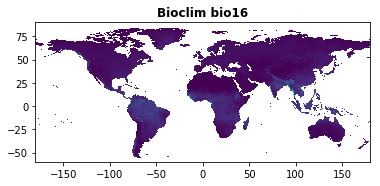

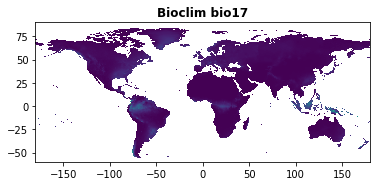

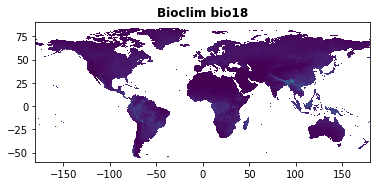

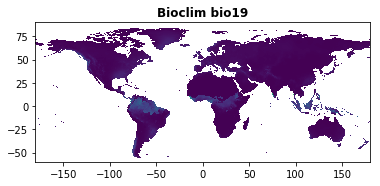

In [8]:
###Read in and inspect raster layers

#ENVIREM dataset
#create list of raster file locations and a list containing only the names of each raster
list_envirem_files=[]
names_envirem=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/5_deg"):
    for file in files:
        if file.endswith('.tif'):
            list_envirem_files.append(file_dir+"/data/GIS/5_deg/"+file)
            name=file.replace(".tif","")
            names_envirem.append(name)
            names_envirem=natsorted(names_envirem,key=lambda y: y.lower())
            
#read in the raster layers and print maps for inspection
for name in names_envirem:
    raster=rasterio.open(file_dir+"/data/GIS/5_deg/"+name+".tif")
    #print(raster.meta) inspect meta information
    show(raster,title="ENVIREM %s"%name)
    
#BIOCLIM dataset
#create list of raster file locations and a list containing only the names of each raster
list_bioclim_files=[]
names_bioclim=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/wc5"):
    for file in files:
        if file.endswith('.tif'):
            list_bioclim_files.append(file_dir+"/data/GIS/wc5/"+file)
            name=file.replace(".tif","")
            names_bioclim.append(name)
            names_bioclim=natsorted(names_bioclim,key=lambda y: y.lower())


#read in the raster layers and print maps for inspection
for name in names_bioclim:
    raster=rasterio.open(file_dir+"/data/GIS/wc5/"+name+".tif") 
    #print(raster.meta) inspect meta information
    show(raster, title="Bioclim %s"%name)

#### Stack the raster files
The raster files can now be stacked to create a single raster file. <br> The output files (as well as the clipped outputs later) will be too large to store on github. Therefore they are stored in a different path

In [10]:
###Stack raster layers into single dataset

#Stack ENVIREM dataset
es.stack(list_envirem_files, r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/data/GIS/env_stacked/ENVIREM_stacked.tif')
#these stacked files are too large to put on github, so save them to another directory

#Stack BIOCLIM dataset
es.stack(list_bioclim_files, r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/data/GIS/env_stacked/BIOCLIM_stacked.tif')
#these stacked files are too large to put on github, so save them to another directory

#Stack ENVIREM+BIOCLIM dataset
list_envirem_bioclim_files=[]
for item in list_envirem_files:
    list_envirem_bioclim_files.append(item)
for item in list_bioclim_files:
    list_envirem_bioclim_files.append(item)

names_envirem_bioclim=[]
for item in names_envirem:
    names_envirem_bioclim.append(item)
for item in names_bioclim:
    names_envirem_bioclim.append(item)

es.stack(list_envirem_bioclim_files, r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/data/GIS/env_stacked/ENVIREM_BIOCLIM_stacked.tif')
#these stacked files are too large to put on github, so save them to another directory

(array([[[-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         ...,
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38]],
 
        [[-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         ...,
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38,
          -3.4e+38],
         [-3.4e+38, -3.

(array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         ...,
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
 
        [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         ...,
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
 
        [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
      

(array([[[-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         ...,
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38]],
 
        [[-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3.400e+38],
         ...,
         [-3.400e+38, -3.400e+38, -3.400e+38, ..., -3.400e+38,
          -3.400e+38, -3

####  Extracting areas of interest from the raster maps based on occurrence data <br>
- first create a dictionary containing the species occurrences
- Then make a function creating a 1000km square buffer around each occurence point for each species<br>
- Afterwards clip the raster file to this buffer extend <br>
- And inspect the output

In [ ]:
#access file with list of taxa names
taxa=pd.read_csv(file_dir+"/data/spec_filtered/taxa.txt",header=None)
taxa.columns=["taxon"]

In [ ]:
#Create dictionary
species_occ_dict={}

for i in taxa["taxon"]:
    taxon_data = pd.read_csv(file_dir+"/data/spec_filtered/%s.csv"%i)
    #add species dataframe to dict
    species_occ_dict["%s"%i] = taxon_data  
    #check whether all species have been included and inspect dictionary
if len(species_occ_dict.keys())==len(taxa["taxon"]):
    print("All species dataframes now in dictionary")
else:
    print("Error: not all species dataframe included")

In [ ]:
#Create environmental raster clip for each species
for key in species_occ_dict:    
    #load occurrence data and set initial projection
    data=species_occ_dict[key]
    spec = data["taxon_name"][0]
    spec = spec.replace(" ","_")
    data['coordinates'] = list(zip(data["decimal_longitude"], data["decimal_latitude"]))
    data['coordinates'] = data["coordinates"].apply(Point)
    geo_data=geopandas.GeoDataFrame(data, geometry='coordinates',crs={'init' :'epsg:4326'})
    
    #change projection to azimuthal equidistant to calculate 1000km buffer around point
    geo_data = geo_data.to_crs({'init': 'esri:54032'}) 
    buffer=geo_data.buffer(1000*1000)
    buffer=buffer.to_crs(epsg=4326)
    
    #create single large polygon from individual buffers
    union_buffer=buffer.unary_union
    
    #open raster map to be clipped to polygon extent
    raster=rasterio.open(r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/data/GIS/env_stacked/ENVIREM_BIOCLIM_stacked.tif')
    #show(raster)

    #specify output tif:
    out_tif = r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/data/GIS/spec_stacked_raster_clip/%s_raster_clip.tif'%spec

    #clip the raster:
    out_img, out_transform = mask(dataset=raster, shapes=[union_buffer],crop=True)

    # Copy the metadata
    out_meta = raster.meta.copy()

    # Parse EPSG code
    epsg_code = int(raster.crs.data['init'][5:])
    out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})
    #save the clipped raster
    with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)
    print("species %s processed"%spec)

Inspect the first band of the clipped raster for all species

In [6]:
    #Inspect the first band of the clipped raster for all species
for key in species_occ_dict:
    ##### Extract occurrence point to plot on the raster (see if correct area was clipped)
    data=species_occ_dict[key]
    spec = data["taxon_name"][0]
    data['coordinates'] = list(zip(data["decimal_longitude"], data["decimal_latitude"]))
    data['coordinates'] = data["coordinates"].apply(Point)
    geo_data=geopandas.GeoDataFrame(data, geometry='coordinates',crs={'init' :'epsg:4326'})
    ####open the clipped raster
    clipped = rasterio.open(r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/data/GIS/spec_stacked_raster_clip/%s_raster_clip.tif'%spec)
    array = clipped.read(1)
    array_data = clipped.read(1,masked=True)
    array_meta = clipped.profile
   
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(array_data,cmap="gray",interpolation="none",vmin=0,
    # Here you must set the spatial extent or else the data will not line up with your geopandas layer
    extent=plotting_extent(clipped),)
    spec_plots_points=geo_data["coordinates"]
    spec_plots_points.plot(ax=ax,
                       marker='o',
                       markersize=20,
                       color='orange')
    ax.set_title("%s \n Raster clip and occurrence points"%spec,
             fontsize=20)
    plt.show()
#Works!

Inspect all 41 bands for a single species

In [ ]:
#Inspect all bands of the clipped raster for a single species
data=species_occ_dict["Alcelaphus_buselaphus"]
spec = data["taxon_name"][0]
clipped = rasterio.open(file_dir+"/data/GIS/spec_stacked_raster_clip/%s_raster_clip.tif"%spec)
for i in range(1,42):
    array = clipped.read(i)
    plt.imshow(array,interpolation='none', vmin=0)
    plt.show()
#Works!